# Linear Discriminant Analysis (LDA)

● Advantages:
It is better interpretable than PCA.
It is a comparatively simple algorithm that is also computationally efficient.
It can handle multicollinearity.
It can even work with big datasets (such that have more features than the
training samples)


● Basics:
LDA is used primarily for dimensionality reduction like PCA but also can be used for classification. Unlike PCA, LDA increases interpretability and minimizes loss of information.
The goal of LDA is to project a dataset onto a lower-dimensional space with good class-separability in order to avoid overfitting ("curse of dimensionality") and also to reduce computational costs. It works by calculating the directions ("linear discriminants") that will represent the axes that maximize the separation between multiple classes. Like PCA it lowers the dimensions of the features and separates the features into different classes.



● Disadvantages:
It assumes that the data has a Gaussian distribution
It assumes that the covariance matrices of the different classes are equal
It assumes that the data is linearly separable
It may not perform well in high-dimensional feature spaces.
It doesn't work well with outliers


In [ ]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings("ignore")



In [ ]:
# read dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=cls)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Exploratory Data Analysis (EDA)

In [ ]:
dataset.shape

(150, 5)

In [ ]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


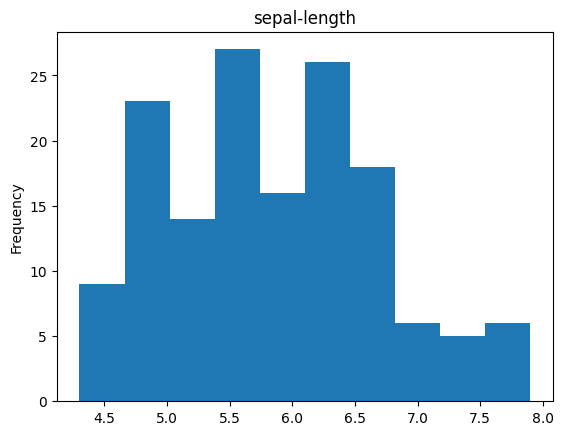

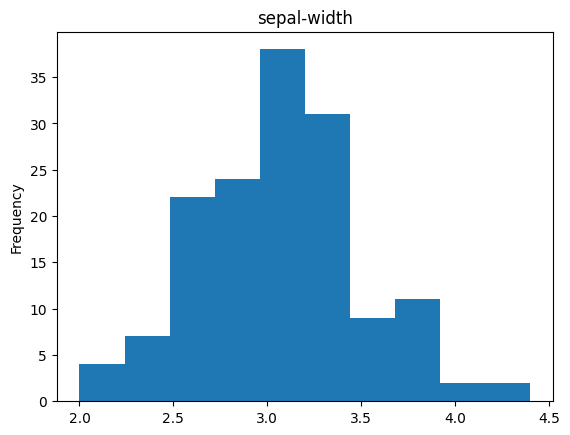

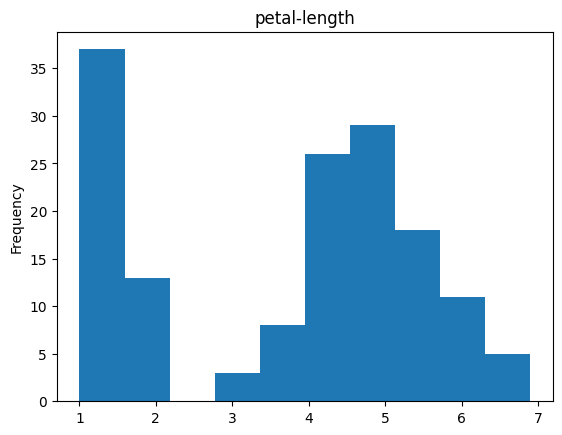

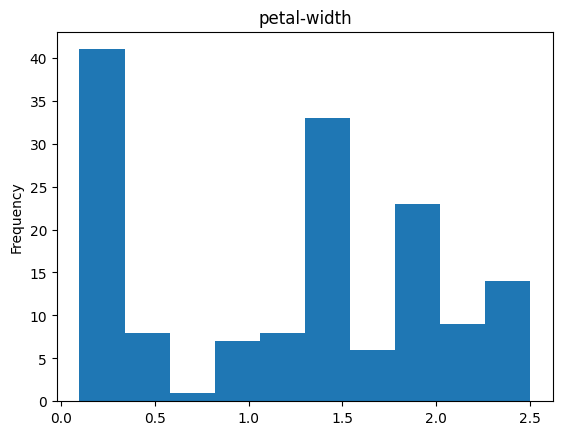

In [ ]:
for col in dataset.columns[:-1]:
    plt.title(col)
    dataset[col].plot.hist() #plotting the histogram with Pandas
    plt.show();

We can see that not all the data has a normal distribution

In [ ]:

# divide the dataset into class and target variable
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# Preprocess the dataset and divide into train and test
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 1)



In [ ]:

# Define the parameter values that should be searched
solver_options = ['svd', 'lsqr', 'eigen']
shrinkage_options = [None, 'auto', 0.1, 0.5, 0.9]

# parameter grid
param_grid = dict(solver=solver_options, shrinkage=shrinkage_options)

# Instantiate the grid
grid = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, cv=10, scoring='accuracy')

# Fit the grid with data
grid.fit(X, y)

# View the complete results
#print(grid.cv_results_)

# Examine the best model
#print(grid.best_score_)
print(grid.best_params_)


{'shrinkage': None, 'solver': 'svd'}


As we can see after tuning the hyperparameters we find wich are the best ones. In this case the best ones are the default ones and this is why they are set to be default, because in most of the cases these is the best choice.

Accuracy : 0.8666666666666667
[[11  0  0]
 [ 4  9  0]
 [ 0  0  6]]


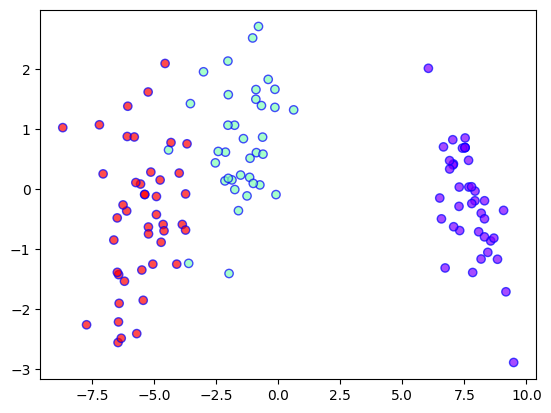

In [ ]:

# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2,
                                 solver = 'svd',
                                 shrinkage = None
                                 )

X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# plot the scatterplot
plt.scatter(
    X_train[:,0],
    X_train[:,1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2, random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)


Now let's try a lognorm transformation to see what is going to happen to the results?

In [ ]:


# divide the dataset into class and target variable and apply LogNorm transformation
X = np.log(dataset.iloc[:, 0:4].values)
y = dataset.iloc[:, 4].values

# Preprocess the dataset and divide into train and test
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 1)

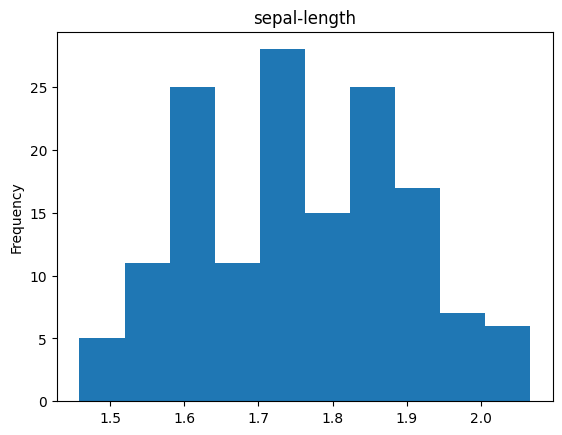

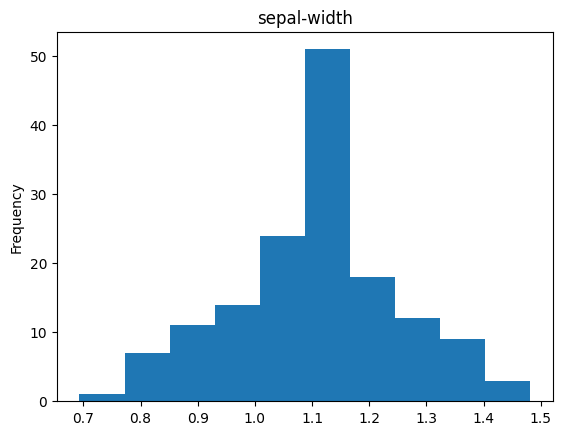

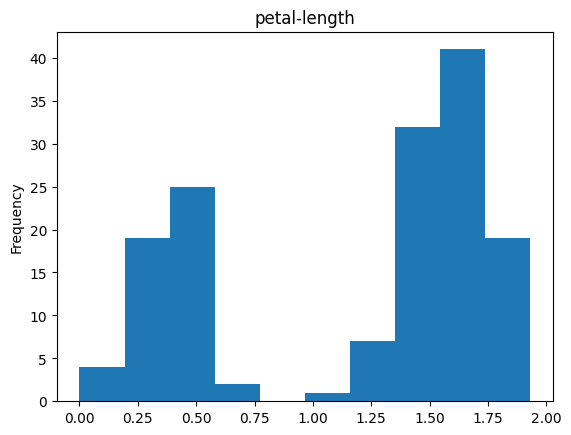

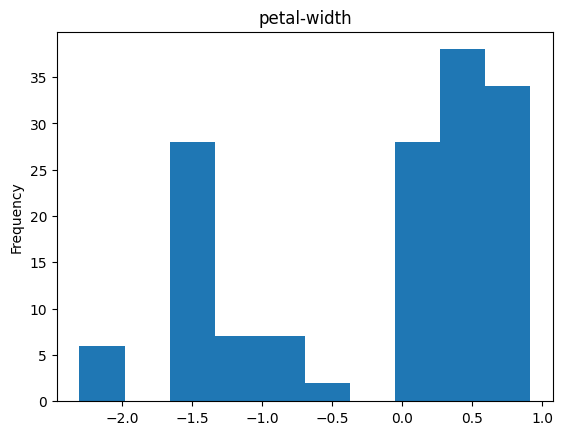

In [ ]:
# 'sepal-length', 'sepal-width', 'petal-length', 'petal-width'

loged_dataset = dataset
loged_dataset['sepal-length'] = np.log(dataset['sepal-length'])
loged_dataset['sepal-width'] = np.log(dataset['sepal-width'])
loged_dataset['petal-length'] = np.log(dataset['petal-length'])
loged_dataset['petal-width'] = np.log(dataset['petal-width'])

for col in loged_dataset.columns[:-1]:
    plt.title(col)
    loged_dataset[col].plot.hist() #plotting the histogram with Pandas
    plt.show();

Well, still does NOT look like normal distribution. This is maybe because the dataset is not big enough for the Central Limit Theorem to be in full power. Over all a log norm transformation makes the data to be closer to a Normal Distribution, which is important for LDA.

In [ ]:
# let's see is there any difference
# Define the parameter values that should be searched
solver_options = ['svd', 'lsqr', 'eigen']
shrinkage_options = [None, 'auto', 0.1, 0.5, 0.9]

# parameter grid
param_grid = dict(solver=solver_options, shrinkage=shrinkage_options)

# Instantiate the grid
grid = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, cv=10, scoring='accuracy')

# Fit the grid with data
grid.fit(X, y)

# View the complete results
#print(grid.cv_results_)

# Examine the best model
#print(grid.best_score_)
print(grid.best_params_)


{'shrinkage': None, 'solver': 'svd'}


Still the best hyperparameters' values are the same, so no difference here

Accuracy : 1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


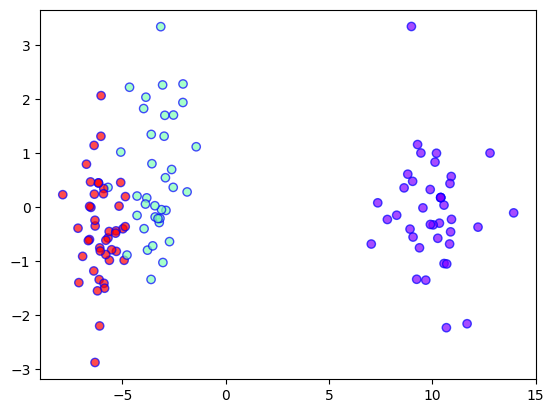

In [ ]:

# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2,
                                 solver = 'svd',
                                 shrinkage = None
                                 )

X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# plot the scatterplot
plt.scatter(
    X_train[:,0],
    X_train[:,1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2, random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)


Now the accuracy is perfect. So we proved that LDA works better when the data is normaly distributed

# Support Vector Machine (SVM)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

Support Vector Machines

Advantages:

- Effective in high-dimensional spaces.
- Memory-efficient as it uses a subset of training points (support vectors) for decision function.
- Versatile as it supports different kernel functions for non-linear decision boundaries.
- Resistant to overfitting, especially in high-dimensional spaces.

Basics:

Support Vector Machine is a supervised machine learning algorithm used for classification and regression tasks. It aims to find a hyperplane in an N-dimensional space (N being the number of features) that distinctly classifies data points into different classes.

Computation/Illustration/Visualization:

The study under SVM model is to decide if the bank note is authentic or not. We import the bank note data from UCI database, explore if it's balanced data, the statistics of the input data including variance, skewness, kurtosis, entropy and class (binary 0 and 1), split 20/80 to test/training data, find the optimal parameters via Grid Search.

In [ ]:
data_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
col_names = ["variance", "skewness", "kurtosis", "entropy", "class"]

bankdata = pd.read_csv(data_link, names=col_names, sep=",", header=None)
bankdata.head()

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
bankdata['class'].unique()

array([0, 1])

In [ ]:
bankdata.shape

(1372, 5)

In [ ]:
bankdata['class'].value_counts(normalize = False)

0    762
1    610
Name: class, dtype: int64

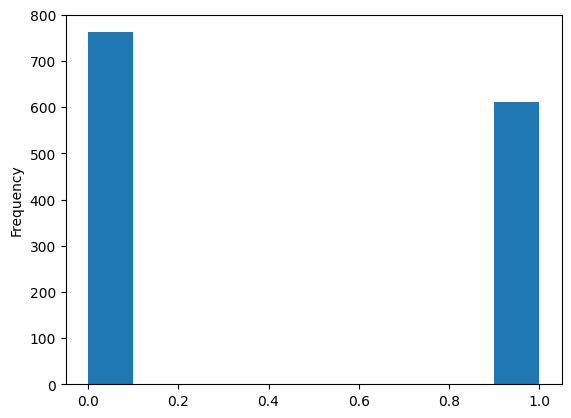

In [ ]:
bankdata['class'].plot.hist();

In [ ]:
bankdata.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
kurtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


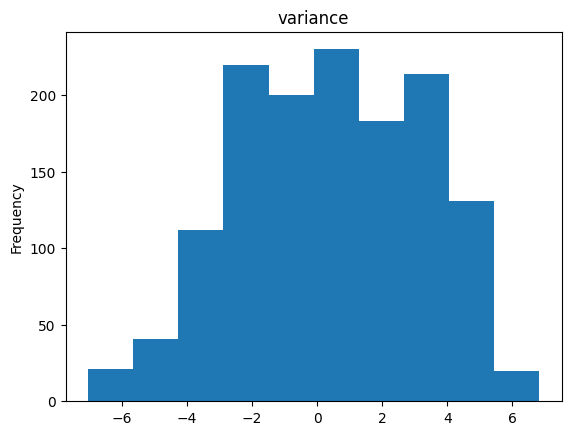

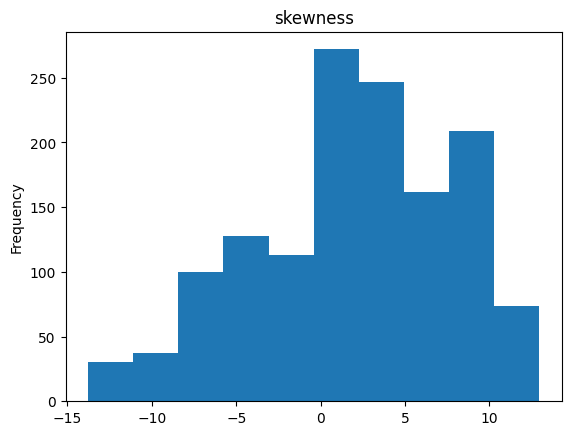

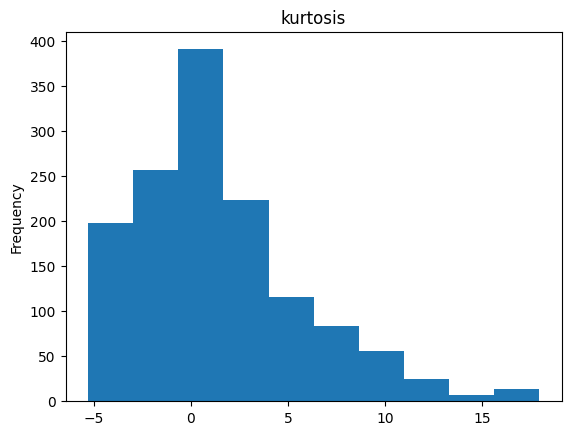

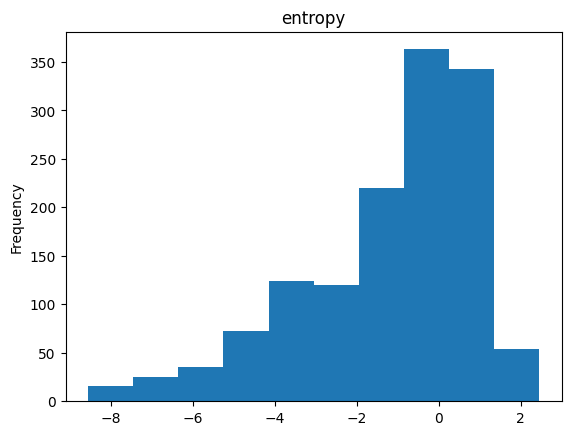

In [ ]:
for col in bankdata.columns[:-1]:
    plt.title(col)
    bankdata[col].plot.hist() #plotting the histogram with Pandas
    plt.show();

variance skewness


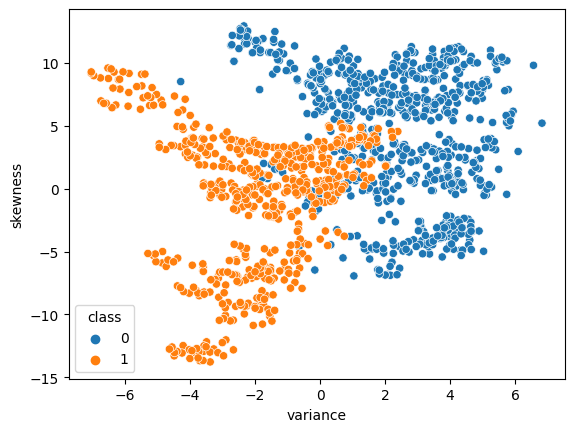

variance kurtosis


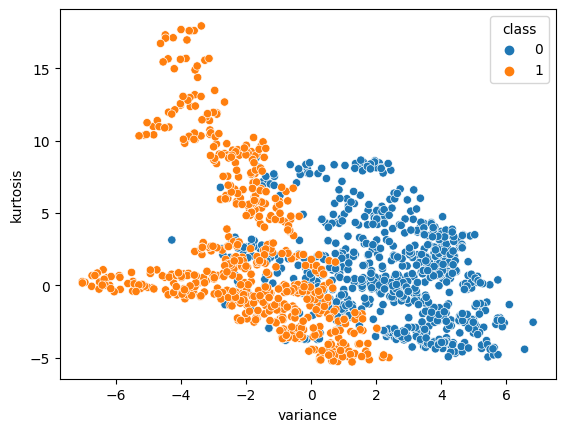

variance entropy


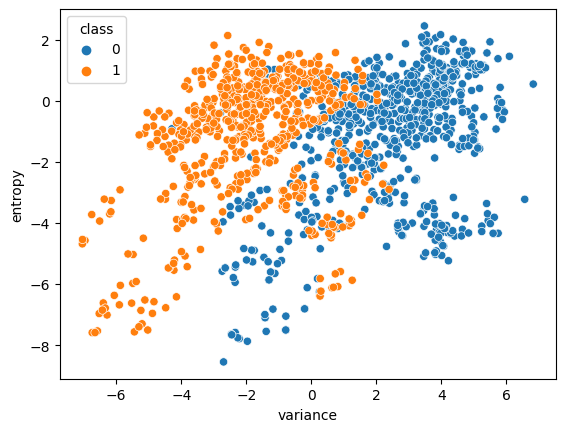

skewness variance


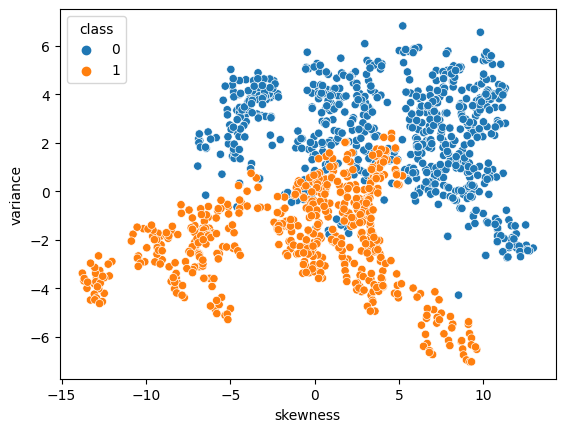

skewness kurtosis


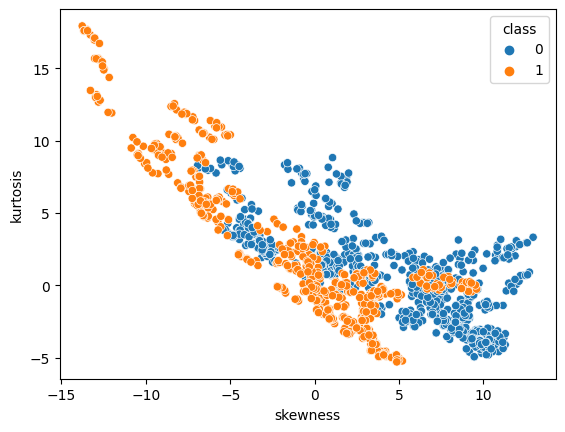

skewness entropy


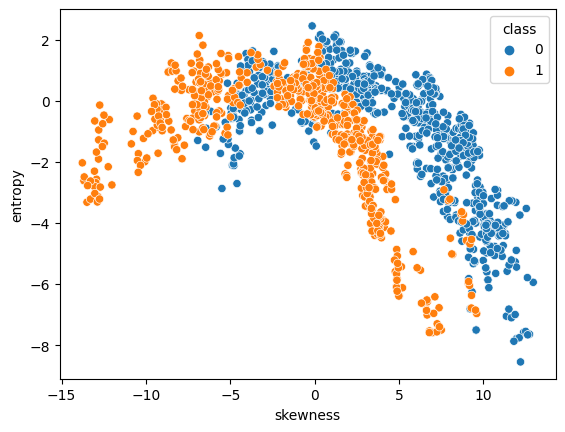

kurtosis variance


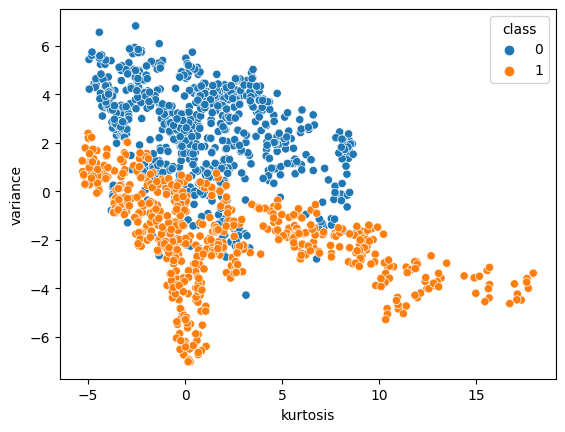

kurtosis skewness


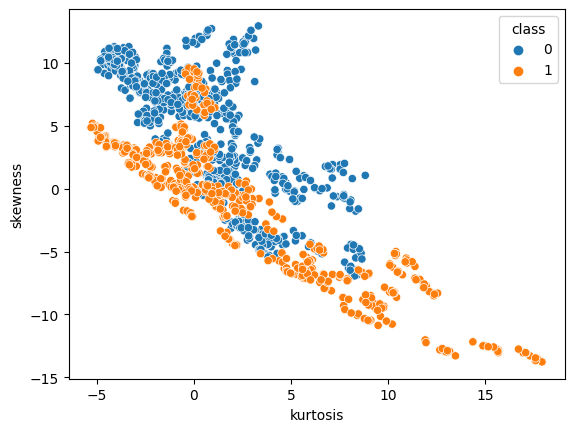

kurtosis entropy


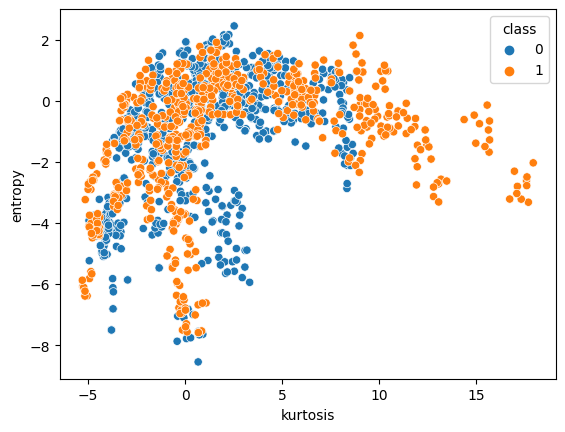

entropy variance


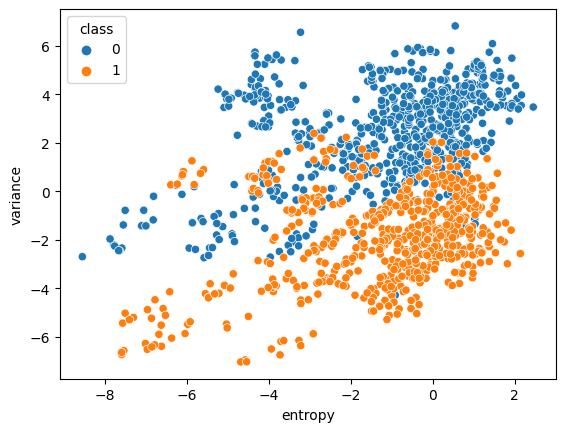

entropy skewness


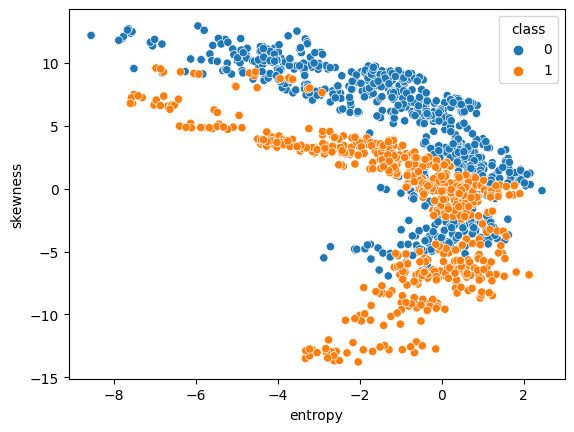

entropy kurtosis


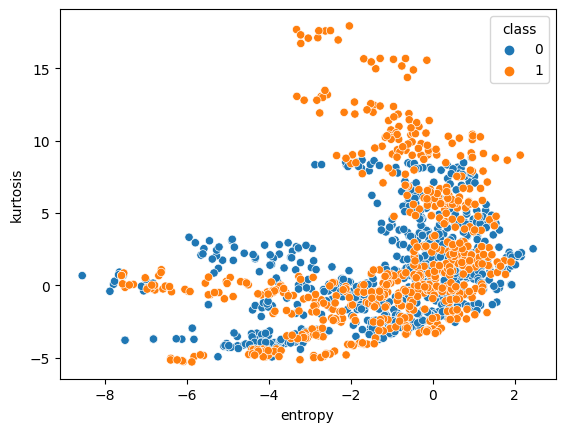

In [ ]:
for feature_1 in bankdata.columns[:-1]:
    for feature_2 in bankdata.columns[:-1]:
        if feature_1 != feature_2: # test if the features are different
            print(feature_1, feature_2) # prints features names
            sns.scatterplot(x=feature_1, y=feature_2, data=bankdata, hue='class') # plots each feature points with its color depending on the class column value
            plt.show();

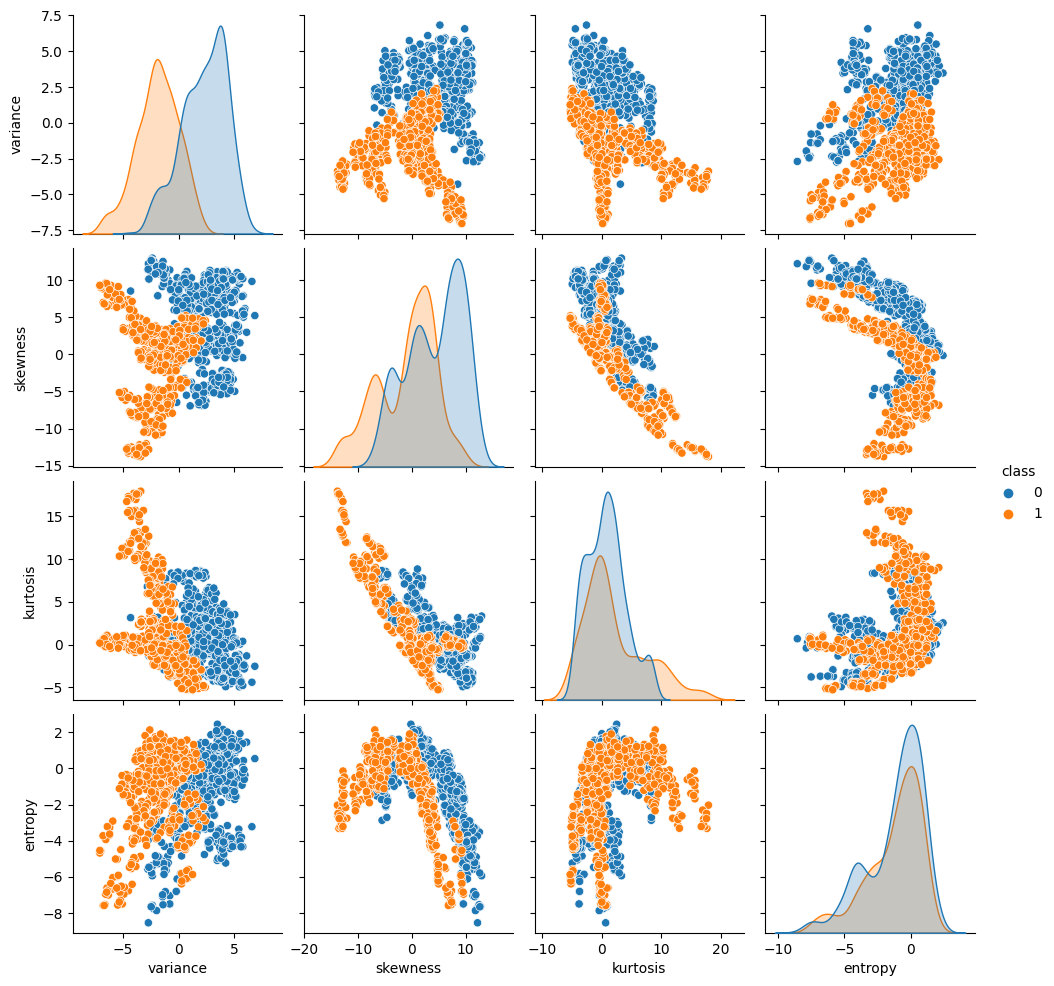

In [ ]:
sns.pairplot(bankdata, hue='class');

From looking at the plots above, it's likely to have non-linear kernel, instead of linear one. To confirm our hypothesis, we apply grid search and found the following results:

    The best model was: SVC(C=0.0001, gamma=10, kernel='poly')
    The best parameter values were: {'C': 0.0001, 'gamma': 10, 'kernel': 'poly'}
    The best f1-score was: 0.9989528795811518

To conclude, according to the results from grid search and the confusion matrix of different kernels, the best model doesn't have a linear kernel, but a nonlinear one, polynomial.

In [ ]:
y = bankdata['class']
X = bankdata.drop('class', axis=1) # axis=1 means dropping from the column axis

In [ ]:
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)

In [ ]:
xtrain_samples = X_train.shape[0]
xtest_samples = X_test.shape[0]

print(f'There are {xtrain_samples} samples for training and {xtest_samples} samples for testing.')

There are 1097 samples for training and 275 samples for testing.


In [ ]:
# calculate gamma
# svc._gamma
number_of_features =  X_train.shape[1]
features_variance = X_train.values.var()
gamma = 1/(number_of_features * features_variance)
print('gamma:', gamma)

gamma: 0.013924748072859962


              precision    recall  f1-score   support

           0       0.82      0.96      0.88       148
           1       0.94      0.76      0.84       127

    accuracy                           0.87       275
   macro avg       0.88      0.86      0.86       275
weighted avg       0.88      0.87      0.86       275



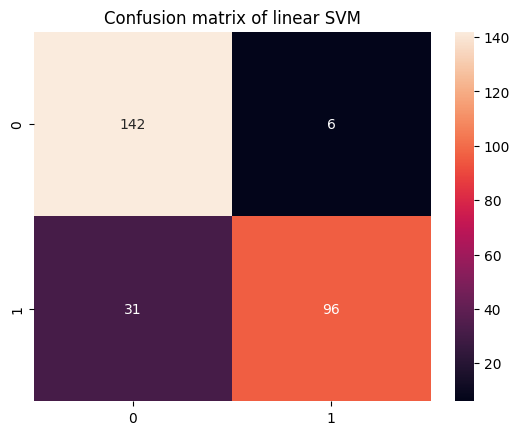

In [ ]:
# linear kernel

svc = SVC(C=0.0001, gamma=10, kernel='linear')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of linear SVM') # fmt='d' formats the numbers as digits, which means integers

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



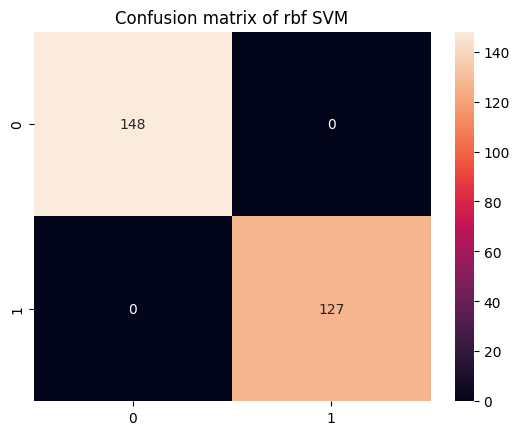

In [ ]:
# rbf f1 score: 0.9979166666666666
svc = SVC(C=1, gamma=1, kernel='rbf')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of rbf SVM') # fmt='d' formats the numbers as digits, which means integers

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       148
           1       1.00      0.99      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



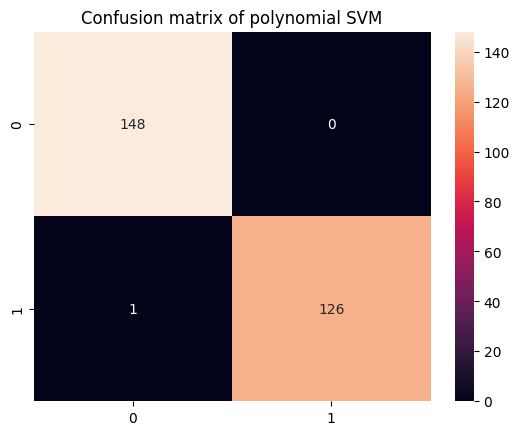

In [ ]:
# polynomial f1 score 0.9989528795811518
svc = SVC(C=0.0001, gamma=10, kernel='poly')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of polynomial SVM') # fmt='d' formats the numbers as digits, which means integers

print(classification_report(y_test,y_pred))

In [ ]:
parameters_dictionary = {'kernel':['rbf', 'sigmoid', 'linear', 'poly'],
                         'C':[0.0001, 1, 10],
                         'gamma':[1, 10, 100]}
svc = SVC()

grid_search = GridSearchCV(svc,
                           parameters_dictionary,
                           scoring = 'f1',
                           return_train_score=True,
                           cv = 5,
                           verbose = 1) # Displays how many combinations of parameters and folds we'll have, for more information as the time to run each search, use 2 or 3 values instead of 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.0001, 1, 10], 'gamma': [1, 10, 100],
                         'kernel': ['rbf', 'sigmoid', 'linear', 'poly']},
             return_train_score=True, scoring='f1', verbose=1)

In [ ]:
best_model = grid_search.best_estimator_
best_parameters = grid_search.best_params_
best_f1 = grid_search.best_score_

print('The best model was:', best_model)
print('The best parameter values were:', best_parameters)
print('The best f1-score was:', best_f1)

The best model was: SVC(C=0.0001, gamma=10, kernel='poly')
The best parameter values were: {'C': 0.0001, 'gamma': 10, 'kernel': 'poly'}
The best f1-score was: 0.9989528795811518


In [ ]:
# to see if there is any overfitting issue
gs_mean_test_scores = grid_search.cv_results_['mean_test_score']
gs_mean_train_scores = grid_search.cv_results_['mean_train_score']

print("The mean test f1-scores were:", gs_mean_test_scores)
print("The mean train f1-scores were:", gs_mean_train_scores)

The mean test f1-scores were: [0.         0.         0.78017291 0.98571413 0.         0.
 0.78017291 0.99895288 0.         0.         0.78017291 0.99895288
 0.99791667 0.53456647 0.98865407 0.99895288 0.76553515 0.53395457
 0.98865407 0.99895288 0.040291   0.54523168 0.98865407 0.99895288
 0.99791667 0.55137487 0.98656    0.99895288 0.79182565 0.54566253
 0.98656    0.99895288 0.09443985 0.54805957 0.98656    0.99895288]
The mean train f1-scores were: [0.         0.         0.78443424 0.98622375 0.         0.
 0.78443424 1.         0.         0.         0.78443424 1.
 1.         0.53606452 0.98762683 1.         1.         0.53359344
 0.98762683 1.         1.         0.5416074  0.98762683 1.
 1.         0.54909414 0.98942923 1.         1.         0.54527912
 0.98942923 1.         1.         0.54868455 0.98942923 1.        ]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       614
           1       1.00      1.00      1.00       483

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



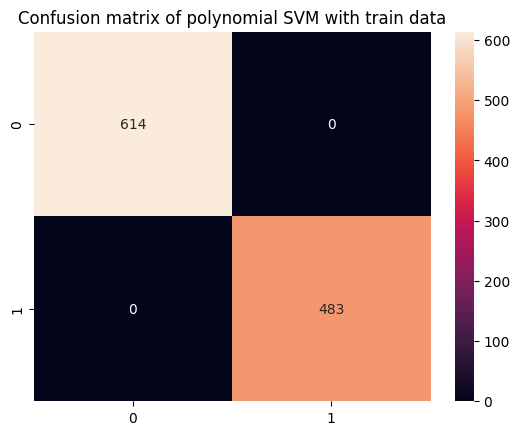

In [ ]:
svc = SVC(C=0.0001, gamma=10, kernel='poly')

svc.fit(X_train, y_train)
y_pred_train = svc.predict(X_train)

cm_train = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d').set_title('Confusion matrix of polynomial SVM with train data')

print(classification_report(y_train,y_pred_train))

Reference:

https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt

https://stackabuse.com/understanding-svm-hyperparameters/


Disadvantages:

- Not suitable for larger datasets as the training time can be high.
- Sensitivity to noisy data and outliers.
- Choosing an appropriate kernel function and tuning hyperparameters can be challenging.

Equations:

The decision function for a linear SVM is given by:

f(x)=sign(w⋅x+b)

where:

w is the weight vector,

x is the input vector,

b is the bias term.

gamma = (1/number of features*features variance)

Features:

- Works well in high-dimensional spaces.
- Effective in cases where the number of dimensions is greater than the number of samples.
- Handles non-linear decision boundaries through kernel trick.

Guide:

Inputs: Training data (X), corresponding labels (y), kernel type, and hyperparameters.

Outputs: A decision function that classifies new data points.

Hyperparameters:

C (regularization parameter): the smaller the value of C, the larger the margin. L2 regularization or ridge regularization

Kernel type (linear, polynomial, radial basis function (RBF), etc.)

Gamma (kernel coefficient for RBF): The higher the value of gamma, the closer are the points that are considered for the decision boundary, and the lower the gamma, the farther points are also considered for choosing the decision boundary.

Journal Reference:

Kumar, Manish and Thenmozhi, M., Forecasting Stock Index Movement: A Comparison of Support Vector Machines and Random Forest. Indian Institute of Capital Markets 9th Capital Markets Conference Paper, Available at SSRN: https://ssrn.com/abstract=876544 or http://dx.doi.org/10.2139/ssrn.876544

Huang, Allen H. and Wang, Hui and Yang, Yi, FinBERT - A Large Language Model for Extracting Information from Financial Text (July 28, 2020). Contemporary Accounting Research, Forthcoming, Available at SSRN: https://ssrn.com/abstract=3910214 or http://dx.doi.org/10.2139/ssrn.3910214

Singh, Siddharth and Kaushik, Mayank and Gupta, Ambuj and Malviya, Anil Kumar, Weather Forecasting Using Machine Learning Techniques (March 11, 2019). Proceedings of 2nd International Conference on Advanced Computing and Software Engineering (ICACSE) 2019, Available at SSRN: https://ssrn.com/abstract=3350281 or http://dx.doi.org/10.2139/ssrn.3350281

Georgoula, Ifigeneia and Pournarakis, Demitrios and Bilanakos, Christos and Sotiropoulos, Dionisios and Sotiropoulos, Dionisios and Giaglis, George M., Using Time-Series and Sentiment Analysis to Detect the Determinants of Bitcoin Prices (May 17, 2015). Available at SSRN: https://ssrn.com/abstract=2607167 or http://dx.doi.org/10.2139/ssrn.2607167

Paul, Sanmoy and Acharya, Sameer Kumar, A Comparative Study on Facial Recognition Algorithms (December 21, 2020). e-journal - First Pan IIT International Management Conference – 2018, Available at SSRN: https://ssrn.com/abstract=3753064 or http://dx.doi.org/10.2139/ssrn.3753064

Huerta, Ramon and Elkan, Charles and Corbacho, Fernando, Nonlinear Support Vector Machines Can Systematically Identify Stocks with High and Low Future Returns (September 6, 2012). Algorithmic Finance (2013), 2:1, 45-58, Available at SSRN: https://ssrn.com/abstract=1930709 or http://dx.doi.org/10.2139/ssrn.1930709

Palanivel, Kodimalar and Surianarayanan, Chellammal, An Approach for Prediction of Crop Yield Using Machine Learning and Big Data Techniques (2019). International Journal of Computer Engineering and Technology 10(3), pp. 110-118, 2019, Available at SSRN: https://ssrn.com/abstract=3555087

TIWARI, MONIKA and Bharuka, Rashi and Shah, Praditi and Lokare, Reena, Breast Cancer Prediction Using Deep Learning and Machine Learning Techniques (March 22, 2020). Available at SSRN: https://ssrn.com/abstract=3558786 or http://dx.doi.org/10.2139/ssrn.3558786

Chen, James Ming, An Introduction to Machine Learning for Panel Data (October 23, 2020). International Advances in Economic Research, Vol. 27, 2021, Available at SSRN: https://ssrn.com/abstract=3717879 or http://dx.doi.org/10.2139/ssrn.3717879
Chakraborty, Chiranjit and Joseph, Andreas, Machine Learning at Central Banks (September 1, 2017). Bank of England Working Paper No. 674, Available at SSRN: https://ssrn.com/abstract=3031796 or http://dx.doi.org/10.2139/ssrn.3031796


Keywords:

Stock Market, Ensemble Methods, Genetic Algorithm, Ghana-Stock-Exchange, Random Forest, Decision Trees, Support Vector Machine, Neural Networks, Stock Market Prediction, Trading Strategies; Support vector machine, Random forest, Forecasting, Stock index; Deep Learning; Large Language Model; Transfer Learning; Interpretable Machine Learning; Sentiment Classification; Environment, Social, and Governance (ESG);  Machine Learning, Weather Forecasting, Artificial Neural Network, Time Series Analysis using Recurrent Neural Network, Time Series Analysis; Bitcoins, error correction, machine learning, sentiment analysis; Eigenvalues; Haar Cascades Facial Recognition Principal Component Analysis, Convolutional Neural Network (CNN), K-Nearest Neighbour (KNN); reinforcement learning, sector neutral; STA, IISTA, Image Restoration, Inverse Problems, l0 Norm, l1 Norm, l2 Data Fidelity Term, Regularization Function, Total Variation; bias-variance tradeoff, decision trees, random forests, extra trees, XGBoost, learning ensembles, boosting, support vector machines, neural networks; artificial intelligence, big data, econometrics, forecasting, inflation, financial markets, banking supervision, financial technology







In [ ]:
# member 2 step 1-3

In [ ]:
# member 3 step 1-3

Neural Networks

● Advantages:

 It’s a very good model for dataset having complex pattern.
It can be easily adapted to new examples.
Parallel processing in Neural Networks can be done.
It requires less formal statistical training.


● Basics:
Neural Network is a model in Machine Learning which is mostly inspired by replicating the human brain with a computerized algorithm. It’s basically a model to establish the relationship between input and output the way human brain establishes. It’s process is simple to understand but difficult to implement which involves input, analyzing or calculation/processing of inputs and then make the decision or give the output.

● Computation:

Using the neural network algorithm to predict the monthly returns of DJI futures using economic indicators from FRED as predictors and formatted the data for predictive analytics scenarios.

In [ ]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# extract api key: put your key in between the angle brackets < >
# myKey = "xxx"
fred_api_key = "<ENTER YOUR API KEY>"

In [ ]:
# Using code from FRED API: Get US Economic Data using Python


def get_fred_data(param_list, start_date, end_date):
    df = pdr.DataReader(param_list, "fred", start_date, end_date)
    return df.reset_index()

In [ ]:
# PCUOMFGOMFG :        Producer Price Index by Industry - Monthly
# BOGZ1FL073164003Q :  Interest Rates and Price Indexes; NYSE Composite Index, Level-Quarterly
# CES0500000003 :      Average hourly earnings of all employees
# MANEMP:              All Employees Manufacturing
# DGORDER:             Durable goods New Orders
# AMTMNO:              Manufacturers' New Orders: Total Manufacturing
# FEDFUNDS:            Fed fund rate. Lagging indicator


series = ["CES0500000003", "MANEMP", "PCUOMFGOMFG", "DGORDER", "AMTMNO"]
# get data for series
df = get_fred_data(param_list=series, start_date="2000-01-01", end_date="2022-05-03")
df.set_index("DATE", drop=True, inplace=True)
print(df.shape)
df.tail(10)

(269, 5)


,CES0500000003,MANEMP,PCUOMFGOMFG,DGORDER,AMTMNO
DATE,,,,,
2021-08-01,30.78,12395,220.114,258736.0,526167.0
2021-09-01,30.96,12437,221.869,254759.0,525605.0
2021-10-01,31.14,12496,225.478,257816.0,534899.0
2021-11-01,31.24,12540,227.109,261651.0,543287.0
2021-12-01,31.42,12584,226.470,267750.0,551072.0
2022-01-01,31.63,12617,231.495,273151.0,559007.0
2022-02-01,31.63,12654,237.245,269191.0,559703.0
2022-03-01,31.83,12716,245.404,268835.0,572249.0
2022-04-01,31.94,12768,249.560,271541.0,576316.0


In [ ]:
import yfinance as yf

# Mini DJI Futures ticker is YM=F
data = yf.download(tickers="YM=F", start="2000-01-01", end="2022-05-03", interval="1mo")
# Print data
print(data.shape)
data.tail(10)

[*********************100%%**********************]  1 of 1 completed
(205, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-01,34570.0,34827.0,32902.0,34399.0,34399.0,2619173
2021-07-01,34448.0,35072.0,33623.0,34832.0,34832.0,3242166
2021-09-01,35382.0,35504.0,33478.0,33722.0,33722.0,3555180
2021-10-01,33752.0,35777.0,33383.0,35704.0,35704.0,3648899
2021-11-01,35796.0,36446.0,34384.0,34457.0,34457.0,3671355
2021-12-01,34524.0,36572.0,33928.0,36226.0,36226.0,3248399
2022-01-01,36304.0,36832.0,33031.0,34997.0,34997.0,5689330
2022-02-01,34915.0,35752.0,32167.0,33840.0,33840.0,5115575
2022-03-01,33822.0,35281.0,32305.0,34618.0,34618.0,3648322


In [ ]:
# Make time zones non-timezone aware so as to allow the join
df.index = df.index.tz_localize(None)
data.index = data.index.tz_localize(None)

In [ ]:
df2predict = pd.merge(df, data["Adj Close"], left_index=True, right_index=True)
print(df2predict.tail())
print(len(df2predict))
df2predict.isnull().sum()
df2predict = df2predict.dropna()

print("Print rows remaining after removed missing values {}".format(len(df2predict)))

            CES0500000003  MANEMP  PCUOMFGOMFG   DGORDER    AMTMNO  Adj Close
2021-12-01          31.42   12584      226.470  267750.0  551072.0    36226.0
2022-01-01          31.63   12617      231.495  273151.0  559007.0    34997.0
2022-02-01          31.63   12654      237.245  269191.0  559703.0    33840.0
2022-03-01          31.83   12716      245.404  268835.0  572249.0    34618.0
2022-04-01          31.94   12768      249.560  271541.0  576316.0    32882.0
205
Print rows remaining after removed missing values 166


In [ ]:
# Store to csv
path2copy = "C:\\Users\\AshKumar\\Downloads"
df2predict.to_csv(path2copy + "/DJI_FuturesPredict.csv", index=True, index_label="Date")

OSError: Cannot save file into a non-existent directory: 'C:\Users\AshKumar\Downloads'

In [ ]:
# read in pre-stored data

df2predict = pd.read_csv(path2copy + "/DJI_FuturesPredict.csv")
df2predict.set_index("Date", drop=True, inplace=True)

# Quick check that the data looks familiar.
df2predict.tail()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\AshKumar\\Downloads/DJI_FuturesPredict.csv'

In [ ]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler

# scale features
scaler = MinMaxScaler()
scale_model = scaler.fit(df2predict[series])
df2predict[series] = scale_model.transform(df2predict[series])
df2predict.tail()

In [ ]:
# Use percent change instead of actual values
# If all columns are transformed to a % change.
# df2predict = df2predict.pct_change()

# % change for just the target column
df2predict["Adj Close"] = df2predict["Adj Close"].pct_change()

# Drop any missing values
df2predict.dropna(inplace=True)
# If a time shift is needed because of a lag.
# `df2predict['AdjClose_shift'] = df2predict['Adj Close'].shift(-1)`
# `df2predict.drop('Adj Close', axis=1, inplace=True)`

# Glimpse of data
df2predict.head()

In [ ]:
target = "Adj Close"
n_pts = 36

for j in np.arange(len(series)):
    # Check the lag

    var = series[j]
    # Define Data
    # choose sample of points to avoid clutter in plot
    df2plot = df2predict.iloc[len(df2predict) - n_pts : len(df2predict),]  # noQA E203
    x = df2plot.index
    data_1 = df2plot[var]
    data_2 = df2plot[target]

    # Create Plot

    fig, ax1 = plt.subplots()

    ax1.set_xlabel("Date")
    ax1.set_ylabel(var, color="red")
    ax1.plot(x, data_1, color="red")
    plt.xticks(rotation=90)  # Rotates X-Axis Ticks by 45-degrees
    # Adding Twin Axes

    ax2 = ax1.twinx()
    ax2.plot(x, data_2, color="blue")

    # Add label

    ax2.set_ylabel("Adj Close returns", color="blue")
    ax2.tick_params(axis="y", color="blue")

    # Show plot

    plt.show()

● Disadvantages:

 It’s computationally a very vast model.
It works well for large data sets and, it’s time consuming.
It has more issues of overfitting.
Understanding and making interpretation of Neural Network is challenging.

● Equations:

Equations that summarize how the model works-
Input Layer- Xo
Hidden Layer- X1
Output Layer- Y
In forward propagation Neural Networks we have the following calculation for Hidden Layer-
X1= f(Xo.Wo + bo)
Where Xo.Wo is a matrix multiplication/dot product of Input layer and Weights. bo is a bias term and f is an activation function.
Then, for calculation of output layers we have the following equation-
Y= f(X1.W1 + b1)
Or, Y= f(f(Xo.Wo + bo).W1 + b1)
Finally, predicted output Y is compared to the actual target T using a loss function L as:
L (Y, T)
Where, L – Loss function
          	Y- predicted output
        	  T- target value
There are many activation functions are used in Neural networks and among them few are as below:
 Sigmoid function-
σ(x)=1/1+e^(-x)



Tangent (Tanh) function-
Tanh(x)= (e^x – e^(-x)) / (e^x + e^(-x))
Rectified Linear unit (ReLU) function-
ReLU(x) = max(0,x)


● Features:

It works well with the complex data set
It can deal with noise and outliers with the help of non-linear activation functions like ReLU
It has the ability of data augmentation which helps to create new training examples by applying transformation to the existing data and it helps to reduce noise.
It works well with real life situations where data are having uncertainties and variations.


● Guide:

Inputs- the input layer of Neural network are neurons of the attributes of input data.
Output- the predictions or result generated by the model based on the processing at hidden layers.
Hidden- this is the layer between input and output of Neural Network in which the learning and extracting of input data are performed with the help of weight matrix.

● Hyperparameters:

Learning rate- the amount of change to the model relative to the change in error.
Activation function- a function that is applied to the output of a neuron in neural network
Epochs- the number of times the entire training dataset pass through the learning algorithm
Size of the layer- the number of layers in input, hidden and output nodes
Regularization- it’s used to reduce impact of overfitting

● Illustration:

Flow diagram of Neural Networks:



Journal:
1.	https://www.ibm.com/topics/neural-networks
2.	Introduction to Machine Learning, Neural Networks and Deep Learning -An article by Rene Y. Choi; Aaron S. Coyner; Jayashree Kalpathy-Cramer; Michael F. Chiang; J. Peter Campbell
3.	Activation Functions in Neural Networks- an article by Sagar Sharma
https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6


Keywords:
Machine Learning, Neural Networks, Hidden Layers, Optimizer, Weights, Loss function, Activation function, Forward propagation, Backward Propagation, Bias, Gradient descent, Vanishing Gradient, Sigmoid, Tangent, optimization, overfitting, noise, Learning rate, Epochs, Batch size, Predictors, Attributes, Pattern, Momentum, Hyperparameter, Algorithm

● References:

https://pubmed.ncbi.nlm.nih.gov/8892489/#:~:text=Neural%20networks%20offer%20a%20number,the%20availability%20of%20multiple%20training
https://www.techtarget.com/searchenterpriseai/definition/neural-network
Neural Network example from WQU Machine Learning in Finance Module 5
https://www.educba.com/neural-network-algorithms/

#### **Step 4: Technical Section**

Support Vector Machine

As we have learned from Step 1-3, SVM has several hyperparameters such as regularization parameter C, kernel and gamma for RBF kernel. We find the optimal hyperparameters via grid search along with cross-validation, including selecting the list of hyperparameters grid, splitting 20/80 to test and training datasets, performing grid search and evaluating on test set.


First, we specify a range of values for each hyperparameter. For example, for the regularization parameter C, we define a set of values like [0.0001, 1, 10]. For the gamma parameter in an RBF kernel, we consider values like [1, 10, 100]. We define a set of kernels such as radial basis function, sigmoid, linear and polynomial.

Second, with splitting the training data into 5 subsets (folds), training the model on 4 folds, and validating on the remaining fold. Repeat this process 5 times, rotating the validation fold each time, we can use the average performance across all folds to assess the model's performance.

We perform Grid Search and evaluate on test sets. As a result, we obtain the following optimal hyperparameter values with the highest F1-score at 0.9989, which has the regularization parameter C at 0.0001, gamma at 10, and polynomial kernel:


The best model was: SVC(C=0.0001, gamma=10, kernel='poly')

The best parameter values were: {'C': 0.0001, 'gamma': 10, 'kernel': 'poly'}

The best f1-score was: 0.9989528795811518

In addition, we also compared the accuracy score with train data. There is no overfitting issues observed.

Neural Networks

Tuning in Neural Network Hyperparameter is done with finding of optimal learning rate which is in between of 0.01 to 1 so that issue of non-convergence can be reduced. The other tuning we did in the Epochs to balance the number of times the algorithm work and the time consumption. Here in the example, we tuned the Epochs from 10 to 100. Also, we tuned the momentum as 0.9 to balance the non-convergence and number of epochs. Also, another tuning is done on batch size which is of size 8 which means the common sizes are in the increment of 8.

#### **Step 5: Marketing Alpha**

Support Vector Machine:

Advantages:

- Effective in high-dimensional spaces.
- Memory-efficient as it uses a subset of training points (support vectors) for decision function.
- Versatile as it supports different kernel functions (eg. sigmoid, radial basis function and polynomial etc) for non-linear decision boundaries.
- Resistant to overfitting, especially in high-dimensional spaces.

Features:

- Works well in high-dimensional spaces.
- Effective in cases where the number of dimensions is greater than the number of samples.
- Handles non-linear decision boundaries through kernel trick.

From our previous example, we find that SVM can select linear, sigmoid, RBF and polynomial kernels to handle both linear and non linear decision boundaries. In general, SVM can handle data effectively in high dimensionality situation, and be robust to outliers.

Neural Networks

Neural Network model works good for dataset which are having a complex pattern. It can adapt and learn from the input which allows to improve the performance by optimizing the processing in hidden layers. Since it has the ability to process multiple inputs simultaneously it’s a good fit where parallel processing is required. Also, it has a better ability to handle noise hence it’s more useful in real world applications where input data has more uncertainty and variability. Neural networks is pattern centric model so it’s good for patter recognition applications like image recognition, speech recognition etc.

#### **Step 6: learn more**

Support Vector Machine

Kumar, Manish and Thenmozhi, M., Forecasting Stock Index Movement: A Comparison of Support Vector Machines and Random Forest. Indian Institute of Capital Markets 9th Capital Markets Conference Paper, Available at SSRN: https://ssrn.com/abstract=876544 or http://dx.doi.org/10.2139/ssrn.876544

Huang, Allen H. and Wang, Hui and Yang, Yi, FinBERT - A Large Language Model for Extracting Information from Financial Text (July 28, 2020). Contemporary Accounting Research, Forthcoming, Available at SSRN: https://ssrn.com/abstract=3910214 or http://dx.doi.org/10.2139/ssrn.3910214

Singh, Siddharth and Kaushik, Mayank and Gupta, Ambuj and Malviya, Anil Kumar, Weather Forecasting Using Machine Learning Techniques (March 11, 2019). Proceedings of 2nd International Conference on Advanced Computing and Software Engineering (ICACSE) 2019, Available at SSRN: https://ssrn.com/abstract=3350281 or http://dx.doi.org/10.2139/ssrn.3350281

Georgoula, Ifigeneia and Pournarakis, Demitrios and Bilanakos, Christos and Sotiropoulos, Dionisios and Sotiropoulos, Dionisios and Giaglis, George M., Using Time-Series and Sentiment Analysis to Detect the Determinants of Bitcoin Prices (May 17, 2015). Available at SSRN: https://ssrn.com/abstract=2607167 or http://dx.doi.org/10.2139/ssrn.2607167

Paul, Sanmoy and Acharya, Sameer Kumar, A Comparative Study on Facial Recognition Algorithms (December 21, 2020). e-journal - First Pan IIT International Management Conference – 2018, Available at SSRN: https://ssrn.com/abstract=3753064 or http://dx.doi.org/10.2139/ssrn.3753064

Huerta, Ramon and Elkan, Charles and Corbacho, Fernando, Nonlinear Support Vector Machines Can Systematically Identify Stocks with High and Low Future Returns (September 6, 2012). Algorithmic Finance (2013), 2:1, 45-58, Available at SSRN: https://ssrn.com/abstract=1930709 or http://dx.doi.org/10.2139/ssrn.1930709

Palanivel, Kodimalar and Surianarayanan, Chellammal, An Approach for Prediction of Crop Yield Using Machine Learning and Big Data Techniques (2019). International Journal of Computer Engineering and Technology 10(3), pp. 110-118, 2019, Available at SSRN: https://ssrn.com/abstract=3555087

TIWARI, MONIKA and Bharuka, Rashi and Shah, Praditi and Lokare, Reena, Breast Cancer Prediction Using Deep Learning and Machine Learning Techniques (March 22, 2020). Available at SSRN: https://ssrn.com/abstract=3558786 or http://dx.doi.org/10.2139/ssrn.3558786

Chen, James Ming, An Introduction to Machine Learning for Panel Data (October 23, 2020). International Advances in Economic Research, Vol. 27, 2021, Available at SSRN: https://ssrn.com/abstract=3717879 or http://dx.doi.org/10.2139/ssrn.3717879
Chakraborty, Chiranjit and Joseph, Andreas, Machine Learning at Central Banks (September 1, 2017). Bank of England Working Paper No. 674, Available at SSRN: https://ssrn.com/abstract=3031796 or http://dx.doi.org/10.2139/ssrn.3031796


Neural Networks

https://www.ibm.com/docs/en/wmla/1.2.3?topic=features-hyperparameter-tuning

Precision education with statistical learning and deep learning: a case study in Taiwan by Shuo-Chang Tsai,  Cheng-Huan Chen,  Yi-Tzone Shiao,  Jin-Shuei Ciou &  Trong-Neng Wu- https://link.springer.com/article/10.1186/s41239-020-00186-2

Artificial Neural Network by Sun-Chong Wang published in the part of The Springer International Series in Engineering and Computer Science book series (SECS, Volume 743)- https://link.springer.com/chapter/10.1007/978-1-4615-0377-4_5

State-of-the-art in artificial neural network applications: A survey: an article by Oludare Isaac Abiodun, Aman Jantan, Abiodun Esther Omolara, Kemi Victoria Dada, Humaira Arshad- https://www.cell.com/heliyon/pdf/S2405-8440(18)33206-7.pdf


https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-a-neural-network/



#### **Step 7: Comparing Models**

| Comparing Models &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  | LDA | SVM | NN|
|:--------:|:----------------|:-------------------|:-------------------|
|  Data Requirements  |  LDA has the assumption of normally distributed classes and equal covariance matrices.   |  SVMs work well especially when the number of features is not too high.  | NN can handle diverse data types but may require a large amount of labeled data for training, and they can benefit from careful preprocessing.|
|  Handling Non-Linearity   |  Due to its linearity assumption, LDA may not perform well when the decision boundary is highly non-linear.   |  SVM can handle both linear and non-linear decision boundaries via selecting appropriate kernels.   | NN can handle nonlinear situations well  |
|  Dimensionality Reduction   |  LDA can be used for dimensionality reduction by projecting the data onto a lower-dimensional subspace while maximizing class separability.  |  SVM can’t perform dimensionality reduction, but it can handle high-dimensional data effectively.  | NN may implicitly perform dimensionality reduction through the learning process.  |
|  Interpretability  |  Most interpretable   |  Less interpretable | Least interpretable  |
|  Sensitivity to Outliers  |  LDA is sensitive to outliers because its method is to find a decision boundary that maximizes class separability.  |  SVMs are generally robust to outliers, especially when using a soft-margin approach.   | NN can be sensitive to outliers, particularly during training.    |
| Computational Complexity  |  It is computationally efficient due to the closed-form solution.   |  Although it can be computationally expensive, especially with large datasets, efficient solvers are available for SVM.  | It can require powerful hardware and longer training times due to more complexity.   |










References